In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

#reading in the data
data = pd.read_csv('dataset.csv')

#changing class codes to numbers, 1 = PD, 0 = healthy, 2 = RBD
def map(code):
    if code.find('PD') != -1:
        return 1
    elif code.find('HC') != -1:
        return 0
    elif code.find('RBD') != -1:
        return 2
        

data = data.rename(columns={'Unnamed: 0': 'code'})
data['code'] = data['code'].apply(map)

data = data.apply(lambda col: col.apply(lambda val: np.nan if val == '-' else val))
#this changed all the dashes to NaN

display(data)



,code,Demographic information,Demographic information.1,Clinical information,Clinical information.1,Clinical information.2,Medication,Medication.1,Medication.2,Medication.3,...,Speech examination: speaking task of monologue.2,Speech examination: speaking task of monologue.3,Speech examination: speaking task of monologue.4,Speech examination: speaking task of monologue.5,Speech examination: speaking task of monologue.6,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11
0,NaN,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voic...,Duration of unvoiced stops (ms),Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms)
1,1.0,58,F,No,56,2,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6,13.81,127
2,1.0,68,F,No,67,1,No,No,No,No,...,8.2,295,264,40.56,26.88,-0.825,-23.26,4,21.77,313
3,1.0,68,M,No,67,1,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4,22.52,201
4,1.0,75,M,No,73,2,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2,14.37,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.0,69,M,NaN,NaN,NaN,No,No,No,No,...,8.43,264,380,36.36,26.88,0.023,-23.12,3,15.41,177
127,0.0,68,M,NaN,NaN,NaN,No,No,No,No,...,4.09,177,359,47.06,22.37,-0.117,-18.67,5,16.94,138
128,0.0,53,M,NaN,NaN,NaN,No,No,No,No,...,5.09,223,391,37.74,40.37,0.411,-15.56,3,19.51,156
129,0.0,44,M,NaN,NaN,NaN,No,No,No,No,...,2.8,252,361,38.92,26.88,0.389,-17.53,4,17.51,154


In [2]:
data["Demographic information.1"] = pd.Categorical(data["Demographic information.1"])
data["Demographic information.1"] = data["Demographic information.1"].cat.codes
data["Clinical information"] = pd.Categorical(data["Clinical information"])
data["Clinical information"] = data["Clinical information"].cat.codes
data["Clinical information"] = pd.Categorical(data["Clinical information"])
data["Clinical information"] = data["Clinical information"].cat.codes


#here we made both history of parkinson disease in family & gender numerical variables. Gender; 0 = F,  1= no, 0=yes for parkinson history!

display(data)

,code,Demographic information,Demographic information.1,Clinical information,Clinical information.1,Clinical information.2,Medication,Medication.1,Medication.2,Medication.3,...,Speech examination: speaking task of monologue.2,Speech examination: speaking task of monologue.3,Speech examination: speaking task of monologue.4,Speech examination: speaking task of monologue.5,Speech examination: speaking task of monologue.6,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11
0,NaN,Age (years),1,2,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voic...,Duration of unvoiced stops (ms),Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms)
1,1.0,58,0,1,56,2,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6,13.81,127
2,1.0,68,0,1,67,1,No,No,No,No,...,8.2,295,264,40.56,26.88,-0.825,-23.26,4,21.77,313
3,1.0,68,2,1,67,1,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4,22.52,201
4,1.0,75,2,1,73,2,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2,14.37,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.0,69,2,0,NaN,NaN,No,No,No,No,...,8.43,264,380,36.36,26.88,0.023,-23.12,3,15.41,177
127,0.0,68,2,0,NaN,NaN,No,No,No,No,...,4.09,177,359,47.06,22.37,-0.117,-18.67,5,16.94,138
128,0.0,53,2,0,NaN,NaN,No,No,No,No,...,5.09,223,391,37.74,40.37,0.411,-15.56,3,19.51,156
129,0.0,44,2,0,NaN,NaN,No,No,No,No,...,2.8,252,361,38.92,26.88,0.389,-17.53,4,17.51,154


In [3]:
print(data.groupby('code').size())
outcome = data['code']
#creating a class that cleans the data/drops variables that we don't want

class Clean: 
    def __init__(self, data):
        self.data = data.drop(columns=['code', 'Medication.1', 'Medication.4', 'Medication.5'])
        UPDRS_name = 'UPDRS III motor scale: specific items'
        UPDRS_cols = ['{0}.{1}'.format(UPDRS_name, i) for i in range(1, 27)]
        self.data = self.data.drop(columns=[UPDRS_name] + UPDRS_cols)
        self.data = self.data.drop(columns=['Clinical information', 'Clinical information.1','Medication.2', 'Clinical information.2', 'Overview of motor examination','Overview of motor examination.1'])
cleaned_data = Clean(data)
display(cleaned_data.data)




code
0.0    50
1.0    30
2.0    50
dtype: int64


,Demographic information,Demographic information.1,Medication,Medication.3,Speech examination: speaking task of reading passage,Speech examination: speaking task of reading passage.1,Speech examination: speaking task of reading passage.2,Speech examination: speaking task of reading passage.3,Speech examination: speaking task of reading passage.4,Speech examination: speaking task of reading passage.5,...,Speech examination: speaking task of monologue.2,Speech examination: speaking task of monologue.3,Speech examination: speaking task of monologue.4,Speech examination: speaking task of monologue.5,Speech examination: speaking task of monologue.6,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11
0,Age (years),1,Antidepressant therapy,Benzodiazepine medication,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing ...,Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voi...,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voic...,Duration of unvoiced stops (ms),Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms)
1,58,0,No,No,1.564,354,6.05,146,264,58.65,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6,13.81,127
2,68,0,No,No,1.564,340,27.52,173,253,48.26,...,8.2,295,264,40.56,26.88,-0.825,-23.26,4,21.77,313
3,68,2,No,No,1.55,211,11.97,377,322,47.54,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4,22.52,201
4,75,2,No,No,1.519,140,-2.49,360,663,13.72,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2,14.37,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,69,2,No,No,1.564,265,3.58,198,365,40.25,...,8.43,264,380,36.36,26.88,0.023,-23.12,3,15.41,177
127,68,2,No,No,1.547,291,6.31,183,359,39.59,...,4.09,177,359,47.06,22.37,-0.117,-18.67,5,16.94,138
128,53,2,No,No,1.54,298,-13.66,177,283,53.01,...,5.09,223,391,37.74,40.37,0.411,-15.56,3,19.51,156
129,44,2,No,No,1.56,359,-2.44,169,256,50.68,...,2.8,252,361,38.92,26.88,0.389,-17.53,4,17.51,154


In [4]:
#one hot encoding for the categorical variables that we wanna use:
#one hot encoding gender, makes the two sexes their own columns (0 and 2)
encoded_dem = {}


for item in set(cleaned_data.data['Demographic information.1'].values):
    encoded_dem[item] = []
    

for value in cleaned_data.data['Demographic information.1'].values:
    
    for key in encoded_dem:
        
        if value == key:
            encoded_dem[key].append(1)
            
        else:
               encoded_dem[key].append(0)
            
for key in encoded_dem:
    cleaned_data.data[key] = encoded_dem[key]

cleaned_data.data = cleaned_data.data.drop(['Demographic information.1'],1)

print(cleaned_data.data)



    Demographic information              Medication  \
0               Age (years)  Antidepressant therapy   
1                        58                      No   
2                        68                      No   
3                        68                      No   
4                        75                      No   
..                      ...                     ...   
126                      69                      No   
127                      68                      No   
128                      53                      No   
129                      44                      No   
130                      54                      No   

                  Medication.3  \
0    Benzodiazepine medication   
1                           No   
2                           No   
3                           No   
4                           No   
..                         ...   
126                         No   
127                         No   
128                         No   

In [5]:
#one hot encoding antidepressant medication

cleaned_data.data['Medication'] = cleaned_data.data['Medication'].apply(map)

def map(Medication):
    if Medication.find('No') != 'No':
         return 'Yes'

encoded_med = {}


for item in set(cleaned_data.data['Medication'].values):
    encoded_med[item] = []
    
    
for value in cleaned_data.data['Medication'].values:
    
    for key in encoded_med:
        
        if value == key:
            encoded_med[key].append(1)
            
        else:
               encoded_med[key].append(0)
            
for key in encoded_med:
    cleaned_data.data[key] = encoded_med[key]

cleaned_data.data = cleaned_data.data.drop(['Medication'],1)

#print(cleaned_data.data)
display(cleaned_data.data)

#antidep med, NaN column, 1 = no 

,Demographic information,Medication.3,Speech examination: speaking task of reading passage,Speech examination: speaking task of reading passage.1,Speech examination: speaking task of reading passage.2,Speech examination: speaking task of reading passage.3,Speech examination: speaking task of reading passage.4,Speech examination: speaking task of reading passage.5,Speech examination: speaking task of reading passage.6,Speech examination: speaking task of reading passage.7,...,Speech examination: speaking task of monologue.6,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11,0,1,2,NaN
0,Age (years),Benzodiazepine medication,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing ...,Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voi...,Duration of unvoiced stops (ms),Decay of unvoiced fricatives (pro...,...,Duration of unvoiced stops (ms),Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms),0,1,0,1
1,58,No,1.564,354,6.05,146,264,58.65,31.38,-2.101,...,22.37,0.588,-19.77,6,13.81,127,1,0,0,1
2,68,No,1.564,340,27.52,173,253,48.26,22.38,-1.745,...,26.88,-0.825,-23.26,4,21.77,313,1,0,0,1
3,68,No,1.55,211,11.97,377,322,47.54,38.12,2.657,...,22.37,-0.955,-13.29,4,22.52,201,0,0,1,1
4,75,No,1.519,140,-2.49,360,663,13.72,44.88,-0.934,...,49.37,0.791,-25.08,2,14.37,151,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,69,No,1.564,265,3.58,198,365,40.25,26.88,-1.872,...,26.88,0.023,-23.12,3,15.41,177,0,0,1,1
127,68,No,1.547,291,6.31,183,359,39.59,31.37,-1.517,...,22.37,-0.117,-18.67,5,16.94,138,0,0,1,1
128,53,No,1.54,298,-13.66,177,283,53.01,50.5,-1.111,...,40.37,0.411,-15.56,3,19.51,156,0,0,1,1
129,44,No,1.56,359,-2.44,169,256,50.68,17.88,-0.823,...,26.88,0.389,-17.53,4,17.51,154,0,0,1,1


In [6]:
#one hot encoding benzo medication

cleaned_data.data = cleaned_data.data.rename(columns={'Medication.3': 'benzo'})



cleaned_data.data['benzo'] = cleaned_data.data['benzo'].apply(map)

def map(benzo):
    if benzo.find('No') != 'No':
        return 'Yes'
    elif benzo.find('Yes') != 'Yes':
        return 'No'

   
encoded_med3 = {}


for item in set(cleaned_data.data['benzo'].values):
    encoded_med3[item] = []
    

for value in cleaned_data.data['benzo'].values:
    
    for key in encoded_med3:
        
        if value == key:
            encoded_med3[key].append(0)
            
        else:
               encoded_med3[key].append(1)
            
for key in encoded_med3:
    cleaned_data.data[key] = encoded_med3[key]

cleaned_data.data = cleaned_data.data.drop(['benzo'],1)

print(cleaned_data.data)

display(cleaned_data.data)

#yes column: 0 = no 

    Demographic information  \
0               Age (years)   
1                        58   
2                        68   
3                        68   
4                        75   
..                      ...   
126                      69   
127                      68   
128                      53   
129                      44   
130                      54   

    Speech examination: speaking task of reading passage  \
0                         Entropy of speech timing (-)     
1                                                1.564     
2                                                1.564     
3                                                 1.55     
4                                                1.519     
..                                                 ...     
126                                              1.564     
127                                              1.547     
128                                               1.54     
129                        

,Demographic information,Speech examination: speaking task of reading passage,Speech examination: speaking task of reading passage.1,Speech examination: speaking task of reading passage.2,Speech examination: speaking task of reading passage.3,Speech examination: speaking task of reading passage.4,Speech examination: speaking task of reading passage.5,Speech examination: speaking task of reading passage.6,Speech examination: speaking task of reading passage.7,Speech examination: speaking task of reading passage.8,...,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11,0,1,2,NaN,Yes
0,Age (years),Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing ...,Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voi...,Duration of unvoiced stops (ms),Decay of unvoiced fricatives (pro...,Relative loudness of respiration (dB),...,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms),0,1,0,1,0
1,58,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,...,0.588,-19.77,6,13.81,127,1,0,0,1,0
2,68,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,...,-0.825,-23.26,4,21.77,313,1,0,0,1,0
3,68,1.55,211,11.97,377,322,47.54,38.12,2.657,-16.89,...,-0.955,-13.29,4,22.52,201,0,0,1,1,0
4,75,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,...,0.791,-25.08,2,14.37,151,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,69,1.564,265,3.58,198,365,40.25,26.88,-1.872,-28.04,...,0.023,-23.12,3,15.41,177,0,0,1,1,0
127,68,1.547,291,6.31,183,359,39.59,31.37,-1.517,-22.87,...,-0.117,-18.67,5,16.94,138,0,0,1,1,0
128,53,1.54,298,-13.66,177,283,53.01,50.5,-1.111,-22.91,...,0.411,-15.56,3,19.51,156,0,0,1,1,0
129,44,1.56,359,-2.44,169,256,50.68,17.88,-0.823,-23.82,...,0.389,-17.53,4,17.51,154,0,0,1,1,0


In [7]:
#PREPROCESSING! removing outcome variable as well as row with all the variable names

values = cleaned_data.data.drop([0])
outcome = outcome.drop([0])


min_max_scaler = preprocessing.MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values)
norm_data = pd.DataFrame(values_scaled)
norm_data.columns = cleaned_data.data.columns
display(norm_data)




,Demographic information,Speech examination: speaking task of reading passage,Speech examination: speaking task of reading passage.1,Speech examination: speaking task of reading passage.2,Speech examination: speaking task of reading passage.3,Speech examination: speaking task of reading passage.4,Speech examination: speaking task of reading passage.5,Speech examination: speaking task of reading passage.6,Speech examination: speaking task of reading passage.7,Speech examination: speaking task of reading passage.8,...,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11,0,1,2,NaN,Yes
0,0.489796,0.921875,0.675079,0.414037,0.171233,0.143777,0.469096,0.292715,0.569613,0.518782,...,0.601560,0.408672,0.375000,0.270924,0.193772,1.0,0.0,0.0,0.0,0.0
1,0.693878,0.921875,0.630915,0.751138,0.263699,0.120172,0.360618,0.097572,0.588944,0.381477,...,0.177618,0.219512,0.208333,0.656023,0.515571,1.0,0.0,0.0,0.0,0.0
2,0.693878,0.812500,0.223975,0.506987,0.962329,0.268240,0.353101,0.438855,0.827976,0.880181,...,0.138614,0.759892,0.208333,0.692308,0.321799,0.0,0.0,1.0,0.0,0.0
3,0.836735,0.570312,0.000000,0.279950,0.904110,1.000000,0.000000,0.585429,0.632982,0.319948,...,0.662466,0.120867,0.041667,0.298016,0.235294,0.0,0.0,1.0,0.0,0.0
4,0.551020,0.757812,0.406940,0.424556,0.393836,0.281116,0.304657,0.633998,0.630864,0.509715,...,0.447645,0.270461,0.291667,0.309627,0.235294,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.714286,0.921875,0.394322,0.375255,0.349315,0.360515,0.276989,0.195143,0.582048,0.158031,...,0.432043,0.227100,0.125000,0.348331,0.280277,0.0,0.0,1.0,0.0,0.0
126,0.693878,0.789062,0.476341,0.418119,0.297945,0.347639,0.270098,0.292498,0.601325,0.492876,...,0.390039,0.468293,0.291667,0.422351,0.212803,0.0,0.0,1.0,0.0,0.0
127,0.387755,0.734375,0.498423,0.104569,0.277397,0.184549,0.410211,0.707285,0.623371,0.490285,...,0.548455,0.636856,0.125000,0.546686,0.243945,0.0,0.0,1.0,0.0,0.0
128,0.204082,0.890625,0.690852,0.280735,0.250000,0.126609,0.385884,0.000000,0.639010,0.431347,...,0.541854,0.530081,0.208333,0.449927,0.240484,0.0,0.0,1.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split
#SPLITTING DATA INTO TRAINING & TESTING!

class Trainer: 
    def __init__(self, norm_data, outcome, train_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(norm_data, outcome, train_size=0.9)
trainer = Trainer(norm_data, outcome, train_size=0.9)

display(trainer.x_train)
display(trainer.x_test)

display(trainer.y_train)


,Demographic information,Speech examination: speaking task of reading passage,Speech examination: speaking task of reading passage.1,Speech examination: speaking task of reading passage.2,Speech examination: speaking task of reading passage.3,Speech examination: speaking task of reading passage.4,Speech examination: speaking task of reading passage.5,Speech examination: speaking task of reading passage.6,Speech examination: speaking task of reading passage.7,Speech examination: speaking task of reading passage.8,...,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11,0,1,2,NaN,Yes
123,0.408163,0.898438,0.662461,0.000000,0.198630,0.135193,0.416475,0.146141,0.457320,0.466321,...,0.309631,0.446070,0.458333,0.345428,0.223183,0.0,0.0,1.0,0.0,0.0
50,0.755102,0.898438,0.470032,0.567122,0.311644,0.221030,0.400188,0.243712,0.683645,0.497409,...,0.271227,0.319783,0.208333,0.556362,0.605536,0.0,0.0,1.0,0.0,0.0
16,0.795918,0.937500,0.627760,0.556445,0.171233,0.156652,0.662038,0.292715,0.382439,0.786269,...,0.520252,0.623848,0.375000,0.515239,0.323529,1.0,0.0,0.0,0.0,0.0
25,0.693878,0.906250,0.577287,0.495525,0.154110,0.208155,0.517645,0.195143,0.611371,0.786917,...,0.209421,0.543631,0.375000,0.151911,0.183391,1.0,0.0,0.0,0.0,0.0
98,0.489796,0.867188,0.760252,0.496938,0.116438,0.109442,0.609939,0.170642,0.658178,0.528497,...,0.197720,0.523035,0.541667,0.351717,0.216263,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.632653,0.843750,0.391167,0.552834,0.366438,0.324034,0.336500,0.195143,0.678160,0.732513,...,0.466847,0.479133,0.375000,0.456701,0.095156,0.0,0.0,1.0,0.0,0.0
85,0.632653,0.796875,0.652997,0.822421,0.178082,0.103004,0.385884,0.487858,0.575804,0.515544,...,0.124212,0.337127,0.166667,0.643445,0.216263,0.0,0.0,1.0,0.0,0.0
65,0.693878,0.507812,0.501577,0.333019,0.380137,0.255365,0.166319,0.365785,0.565541,0.674870,...,0.319832,0.312195,0.041667,0.774552,0.159170,0.0,0.0,1.0,0.0,0.0
57,0.265306,0.976562,0.832808,0.897001,0.157534,0.008584,0.645333,0.195143,0.696677,0.560881,...,0.457846,0.278049,0.125000,0.665699,0.532872,0.0,0.0,1.0,0.0,0.0


,Demographic information,Speech examination: speaking task of reading passage,Speech examination: speaking task of reading passage.1,Speech examination: speaking task of reading passage.2,Speech examination: speaking task of reading passage.3,Speech examination: speaking task of reading passage.4,Speech examination: speaking task of reading passage.5,Speech examination: speaking task of reading passage.6,Speech examination: speaking task of reading passage.7,Speech examination: speaking task of reading passage.8,...,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11,0,1,2,NaN,Yes
76,0.795918,0.843750,0.675079,0.494583,0.116438,0.160944,0.364481,0.243712,0.321514,0.455959,...,0.591659,0.327371,0.291667,0.349782,0.093426,0.0,0.0,1.0,0.0,0.0
117,1.000000,0.929688,0.501577,0.206469,0.164384,0.319742,0.429004,0.341500,0.691247,0.441710,...,0.628263,0.314363,0.375000,0.237542,0.147059,1.0,0.0,0.0,0.0,0.0
83,0.551020,0.781250,0.794953,0.171455,0.044521,0.103004,0.313218,0.097572,0.421373,0.792098,...,0.290729,0.196206,0.125000,0.484761,0.174740,0.0,0.0,1.0,0.0,0.0
63,0.714286,0.859375,0.514196,0.417177,0.311644,0.229614,0.396012,0.268213,0.746796,0.166451,...,0.363936,0.346341,0.125000,0.484277,0.181661,0.0,0.0,1.0,0.0,0.0
93,0.734694,0.750000,0.649842,0.540901,0.147260,0.188841,0.377845,0.243929,0.787142,0.299870,...,0.526853,0.269377,0.458333,0.138849,0.117647,1.0,0.0,0.0,0.0,0.0
15,0.612245,0.765625,0.776025,0.427226,0.140411,0.103004,0.409376,0.219428,0.607570,0.575130,...,0.613561,0.457995,0.125000,0.253024,0.089965,1.0,0.0,0.0,0.0,0.0
26,0.775510,0.859375,0.583596,0.423300,0.260274,0.169528,0.537273,0.097355,0.655517,0.558290,...,0.487249,0.414092,0.291667,0.473149,0.147059,0.0,0.0,1.0,0.0,0.0
128,0.204082,0.890625,0.690852,0.280735,0.250000,0.126609,0.385884,0.000000,0.639010,0.431347,...,0.541854,0.530081,0.208333,0.449927,0.240484,0.0,0.0,1.0,0.0,0.0
89,0.816327,0.835938,0.618297,0.415764,0.226027,0.118026,0.627688,0.073070,0.509883,0.308290,...,0.323732,0.276423,0.750000,0.049831,0.389273,1.0,0.0,0.0,0.0,0.0
108,0.755102,0.937500,0.662461,0.469304,0.219178,0.100858,0.545834,0.414571,0.520417,0.922280,...,0.263726,0.739295,0.125000,0.640058,0.119377,1.0,0.0,0.0,0.0,0.0


124    0.0
51     2.0
17     1.0
26     1.0
99     0.0
      ... 
71     2.0
86     0.0
66     2.0
58     2.0
125    0.0
Name: code, Length: 117, dtype: float64

In [9]:
#SVM MODEL

from sklearn.svm import SVC
from sklearn import metrics

svclassifier = SVC(kernel='linear', C = 1)
svclassifier.fit(trainer.x_train, trainer.y_train)

y_pred = svclassifier.predict(trainer.x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(trainer.y_test,y_pred))
print(classification_report(trainer.y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(trainer.y_test, y_pred))

[[4 2 1]
 [1 0 3]
 [1 0 1]]
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62         7
         1.0       0.00      0.00      0.00         4
         2.0       0.20      0.50      0.29         2

    accuracy                           0.38        13
   macro avg       0.29      0.36      0.30        13
weighted avg       0.39      0.38      0.38        13

Accuracy: 0.38461538461538464


In [10]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(trainer.x_train, trainer.y_train) 
  
# accuracy  
accuracy = knn.score(trainer.x_test, trainer.y_test) 
print(accuracy)
  
# confusion matrix 
knn_predictions = knn.predict(trainer.x_test)  
cm = confusion_matrix(trainer.y_test, knn_predictions)



0.23076923076923078


In [11]:
#NAIVEBAYES model

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(trainer.x_train, trainer.y_train) 
gnb_predictions = gnb.predict(trainer.x_test) 
  
# accuracy
accuracy = gnb.score(trainer.x_test, trainer.y_test) 
print(accuracy)
  
#confusion matrix 
naive_con = confusion_matrix(trainer.y_test, gnb_predictions) 
print(naive_con)
print("Accuracy:",metrics.accuracy_score(trainer.y_test, gnb_predictions))




0.46153846153846156
[[4 2 1]
 [1 1 2]
 [1 0 1]]
Accuracy: 0.46153846153846156


In [12]:
#random forests classifier, creating a class that does this and balances the data as well through 'class_weight' parameter! 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
import statistics
from sklearn import metrics
import matplotlib.pyplot as plt


class Classifier:
    def __init__(self): 
        self.classifier = RandomForestClassifier(n_estimators = 100, bootstrap= True, criterion = 'entropy', random_state = 42, class_weight='balanced')
        self.fit = self.classifier.fit(trainer.x_train, trainer.y_train)
        self.randompreds = self.fit.predict(trainer.x_test)
        self.randomaccuracy = self.fit.score(trainer.x_test, trainer.y_test)

classifier = Classifier()

y_pred = classifier.fit.predict(trainer.x_test)

#showing accuracy
print(classifier.randomaccuracy)
print(pd.crosstab(trainer.y_test, y_pred))
print(confusion_matrix(trainer.y_test, y_pred))
print(classification_report(trainer.y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(trainer.y_test, y_pred))





0.38461538461538464
col_0  0.0  1.0  2.0
code                
0.0      4    1    2
1.0      1    0    3
2.0      1    0    1
[[4 1 2]
 [1 0 3]
 [1 0 1]]
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62         7
         1.0       0.00      0.00      0.00         4
         2.0       0.17      0.50      0.25         2

    accuracy                           0.38        13
   macro avg       0.28      0.36      0.29        13
weighted avg       0.38      0.38      0.37        13

Accuracy: 0.38461538461538464


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

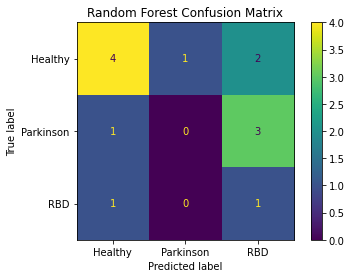

In [13]:
import matplotlib.pyplot as plt
#creating a confusion matrix

class_names = ['Healthy', 'Parkinson', 'RBD']
plot_confusion_matrix(classifier.fit, trainer.x_test, trainer.y_test, values_format = '.4g', display_labels=class_names)
plt.title("Random Forest Confusion Matrix")
#shows visual confusion matrix... that parkinsons is the worst one! 






In [14]:
# This shows the list of feature importances!


feature_importances_df = pd.DataFrame(
    {"feature": list(norm_data.columns), "importance": classifier.classifier.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df

#this shows which speech feature has the most importance, but even that is extremely small.. up to 0.08! 




,feature,importance
16,Speech examination: speaking task of monologue.3,0.069167
14,Speech examination: speaking task of monologue.1,0.062522
15,Speech examination: speaking task of monologue.2,0.056271
9,Speech examination: speaking task of reading p...,0.048706
12,Speech examination: speaking task of reading p...,0.047713
3,Speech examination: speaking task of reading p...,0.045038
2,Speech examination: speaking task of reading p...,0.044480
5,Speech examination: speaking task of reading p...,0.043773
4,Speech examination: speaking task of reading p...,0.041934
24,Speech examination: speaking task of monologue.11,0.041809


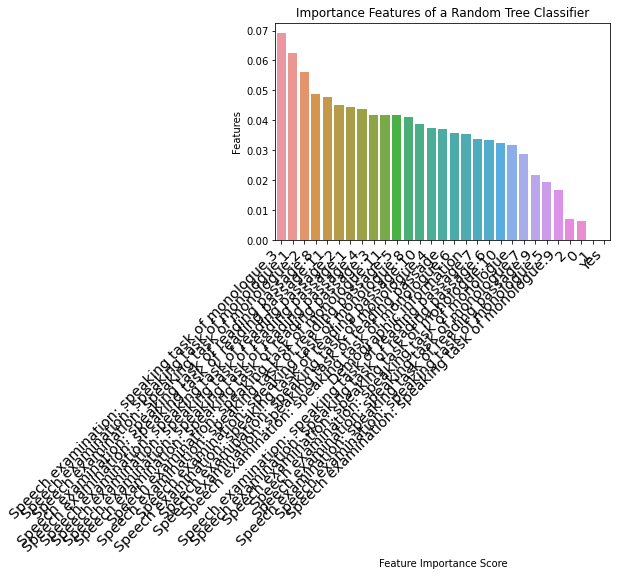

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#this is an importances graph just to visualize feature importances! 

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Importance Features of a Random Tree Classifier")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [17]:
#evaluate with k-fold validation instead? creating a class that does this!
print(outcome)

class KFold:
    def __init__(self, norm_data, outcome):    
        self.cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=20, random_state=42)
        self.scores = cross_val_score(classifier.classifier, norm_data, outcome, scoring='accuracy', cv=self.cv, n_jobs=-1)
kfold = KFold(norm_data, outcome)
print(kfold.scores)


print('Mean Accuracy: %.3f (%.3f)' % (statistics.mean(kfold.scores), statistics.stdev(kfold.scores)))



1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
126    0.0
127    0.0
128    0.0
129    0.0
130    0.0
Name: code, Length: 130, dtype: float64
[0.47727273 0.46511628 0.48837209 0.54545455 0.51162791 0.44186047
 0.43181818 0.48837209 0.41860465 0.5        0.55813953 0.48837209
 0.5        0.41860465 0.48837209 0.52272727 0.48837209 0.48837209
 0.61363636 0.51162791 0.44186047 0.40909091 0.55813953 0.55813953
 0.45454545 0.58139535 0.44186047 0.56818182 0.48837209 0.48837209
 0.47727273 0.51162791 0.48837209 0.43181818 0.46511628 0.53488372
 0.54545455 0.48837209 0.48837209 0.47727273 0.58139535 0.39534884
 0.54545455 0.44186047 0.44186047 0.47727273 0.44186047 0.58139535
 0.54545455 0.53488372 0.3255814  0.61363636 0.48837209 0.53488372
 0.52272727 0.41860465 0.58139535 0.47727273 0.39534884 0.46511628]
Mean Accuracy: 0.493 (0.058)


In [18]:
#summary: so far we have gender, antidepressant meds, and benzo meds as additional categorical variables and they have NOT improved accuracy. 

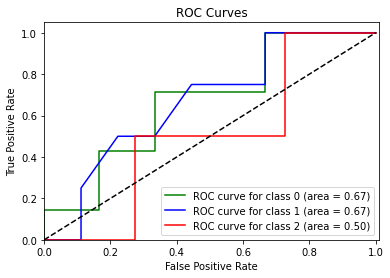

             Precision    Recall  F1-score  Support  pred       AUC
0.0           0.666667  0.571429  0.615385      7.0   6.0  0.666667
1.0           0.000000  0.000000  0.000000      4.0   1.0  0.666667
2.0           0.166667  0.500000  0.250000      2.0   6.0  0.500000
avg / total   0.384615  0.384615  0.369822     13.0  13.0  0.594675


In [19]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from scipy import interp
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

#creating a class that returns AUC scores for each class and makes an ROC curve out of them


class Report:
    def __init__(self, y_true, y_pred, y_score=None, average='micro'):
        
        lab = LabelBinarizer()

        if len(y_true.shape) == 1:
            lab.fit(y_true)

    #Value counts of predictions
        labels, cnt = np.unique(
            y_pred,
            return_counts=True)
        n_classes = len(labels)
        pred_count = pd.Series(cnt, index=labels)

        metrics_summary = precision_recall_fscore_support(
                y_true=y_true,
                y_pred=y_pred,
                labels=labels)

        avg = list(precision_recall_fscore_support(
                y_true=y_true, 
                y_pred=y_pred,
                average='weighted'))

        metrics_sum_index = ['Precision', 'Recall', 'F1-score', 'Support']
        class_report_df = pd.DataFrame(
            list(metrics_summary),
            index=metrics_sum_index,
            columns=labels)

        support = class_report_df.loc['Support']
        total = support.sum() 
        class_report_df['avg / total'] = avg[:-1] + [total]

        class_report_df = class_report_df.T
        class_report_df['pred'] = pred_count
        class_report_df['pred'].iloc[-1] = total

        if not (y_score is None):
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for label_it, label in enumerate(labels):
                fpr[label], tpr[label], _ = roc_curve(
                    (y_true == label).astype(int), 
                    y_score[:, label_it])

                roc_auc[label] = auc(fpr[label], tpr[label])

            if average == 'micro':
                if n_classes <= 2:
                    fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lab.transform(y_true).ravel(), 
                        y_score[:, 1].ravel())
                else:
                    fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                            lab.transform(y_true).ravel(), 
                            y_score.ravel())

                roc_auc["avg / total"] = auc(
                    fpr["avg / total"], 
                    tpr["avg / total"])

            colors = ['green', 'blue', 'red']
            for i, color in zip(range(n_classes), colors):
                plt.plot(fpr[i], tpr[i], color=color,
                    label='ROC curve for class {0} (area = {1:0.2f})'
                        ''.format(i, roc_auc[i]))
            plt.title('ROC Curves')
            plt.legend(loc="lower right")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.01])
            plt.ylim([0.0, 1.05])
            plt.style.use('classic')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.show()

            class_report_df['AUC'] = pd.Series(roc_auc)
        self.report = class_report_df

report_with_auc = Report(y_true= trainer.y_test, y_pred=classifier.fit.predict(trainer.x_test), y_score=classifier.fit.predict_proba(trainer.x_test))
print(report_with_auc.report)



In [19]:
#worst performing one is PD!

